In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()
# https://wikidocs.net/264614 

True

In [2]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages


# State 정의
class State(TypedDict):
    # list 타입에 add_messages 적용(list 에 message 추가)
    messages: Annotated[list, add_messages]

In [3]:
# !pip install langchain-ollama

In [4]:
# from langchain_openai import ChatOpenAI
from langchain_community.chat_models import ChatOllama
# from langchain_ollama import ChatOllama

# LLM 초기화
# llm = ChatOpenAI(api_key="ollama", model="mistral:latest", base_url="http://61.108.166.16:11434")
# llm = ChatOpenAI(model="gpt-4o-mini")
# llm = ChatOllama(model="mistral:latest", base_url="http://61.108.166.16:11434")
llm = ChatOllama(model="mistral:latest", temperature=0, base_url = "http://192.168.1.203:11434")
# llm = ChatOllama(model="mistral:latest", base_url="http://ollama_dev:11434")


C:\Users\kevin\AppData\Local\Temp\ipykernel_17492\3623621652.py:9: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model="mistral:latest", temperature=0, base_url = "http://192.168.1.203:11434")


In [5]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"
llm.invoke(question)

AIMessage(content='1. 삼계탕 삼가촌 삼계탕 (Samgae-dong, Samgyetang) - 한국의 대표적인 여름 음식으로, 치icken soup with ginseng and glutinous rice.\n\n2. 서울 시장 갈비찜 (Seoul Market Galbi Jjim) - 고기를 빠르게 탕에 담아 조리한 전통적인 한국 요리.\n\n3. 동대문 이마트 식당 김치찌개 (Dongdaemun Imart Restaurant Kimchi Jjigae) - 김치, 돼지고기, 토툽, 계란을 포함한 전통적인 한국 요리.\n\n4. 서울 시장 삼계탕 (Seoul Market Samgyetang) - 여름에 가장 추천되는 한국 음식 중 하나로, 치icken soup with ginseng and glutinous rice.\n\n5. 서울 시장 삼계탕 (Seoul Market Samgyetang) - 여름에 가장 추천되는 한국 음식 중 하나로, 치icken soup with ginseng and glutinous rice.\n\n6. 서울 시장 삼계탕 (Seoul Market Samgyetang) - 여름에 가장 추천되는 한국 음식 중 하나로, 치icken soup with ginseng and glutinous rice.\n\n7. 서울 시장 삼계탕 (Seoul Market Samgyetang) - 여름에 가장 추천되는 한국 음식 중 하나로, 치icken soup with ginseng and glutinous rice.\n\n8. 서울 시장 삼계탕 (Seoul Market Samgyetang) - 여름에 가장 추천되는 한국 음식 중 하나로, 치icken soup with ginseng and glutinous rice.\n\n9. 서울 시장 삼계탕 (Seoul Market Samgyetang) - 여름에 가장 추천되는 한국 음식 중 하나로, 치icken soup with ginseng and glutinous rice.\n\n10. 서울 시장 삼계

In [6]:
# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}

In [7]:
# 그래프 생성 및 노드를 추가
from langgraph.graph import StateGraph, START, END

# 상태 그래프 초기화
graph_builder = StateGraph(State)

# 노드 추가
graph_builder.add_node("chatbot", chatbot)

In [8]:
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")
# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

In [9]:
# 그래프 컴파일
graph = graph_builder.compile()

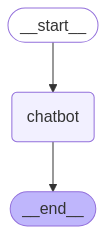

In [10]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: 1. 삼계탕 삼계탕 (Samgyetang Gukjeon): 한국의 대표적인 여름 음식으로, 치킨, 밥, 양념, 당근, 깡샘백등이 담긴 육수에 끓인 삼계탕.

2. 강철집 강철집 (Gangjeoljip Gangjeoljip): 서울특별시 중구 대문로5가 36-10. 전통적인 한국 음식을 맛보실 수 있는 곳으로, 강철집은 고기 조리에 특화되어 있습니다.

3. 서울탕수육 서울탕수육 (Seoul Tangsuyuk): 한국의 대표적인 치킨 요리로, 겉에는 달콤하고 속에는 맛있습니다.

4. 서울시장 서울시장 (Seoul Market): 서울특별시 중구 대문로5가 36-10. 한국의 전통적인 음식을 맛보실 수 있는 곳으로, 여기에서는 다양한 음식을 즐길 수 있습니다.

5. 삼계탕 삼계탕 (Samgyetang Gukjeon): 한국의 대표적인 여름 음식으로, 치킨, 밥, 양념, 당근, 깡샘백등이 담긴 육수에 끓인 삼계탕.

6. 서울탕수육 서울탕수육 (Seoul Tangsuyuk): 한국의 대표적인 치킨 요리로, 겉에는 달콤하고 속에는 맛있습니다.

7. 서울시장 서울시장 (Seoul Market): 서울특별시 중구 대문로5가 36-10. 한국의 전통적인 음식을 맛보실 수 있는 곳으로, 여기에서는 다양한 음식을 즐길 수 있습니다.

8. 강철집 강철집 (Gangjeoljip Gangjeoljip): 서울특별시 중구 대문로5가 36-10. 전통적인 한국 음식을 맛보실 수 있는 곳으로, 강철집은 고기 조리에 특화되어 있습니다.

9. 서울탕수육 서울탕수육 (Seoul Tangsuyuk): 한국의 대표적인 치킨 요리로, 겉에는 달콤하고 속에는 맛있습니다.

10. 서울시장 서울시장 (Seoul Market): 서울특별시 중구 대문로5가 36-10. 한국의 전통적인 음식을 맛보실 수 있는 곳으로, 여기에서는 다양한 음식을 즐길 수 있습니다.

위의 TOP 10은 서울의 유명한 맛집으로, 각각 특정 요리나 음식을 전문적으로 조리하고 있는 곳들입니다. 이러한 